Import modules and libraries required for project

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson
from sklearn.model_selection import train_test_split
from sklearn import cluster, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

/Users/jitsen/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Import data pertaining to Air Quality Measures

In [7]:
Air_Qual = pd.read_csv('Air_Qual.csv')

Death_2012_1 = pd.read_csv('Underlying Cause of Death, 2012.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2012_1['Year'] = 2012
Death_2013_1 = pd.read_csv('Underlying Cause of Death, 2013.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2013_1['Year'] = 2013
Death_2014_1 = pd.read_csv('Underlying Cause of Death, 2014.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2014_1['Year'] = 2014
Death_2015_1 = pd.read_csv('Underlying Cause of Death, 2015.txt',sep='\t', usecols = ["ICD Sub-Chapter","ICD Sub-Chapter Code","State","State Code","County","County Code","2013 Urbanization","2013 Urbanization Code","Five-Year Age Groups","Five-Year Age Groups Code","Deaths","Population","Crude Rate","% of Total Deaths"])
Death_2015_1['Year'] = 2015

Import data on diabetes

In [8]:
Diabetes = pd.read_csv('Diabetes.csv',sep=',', usecols = ['State','County','Prevalence, 1999, Both Sexes',
'Prevalence, 2000, Both Sexes','Prevalence, 2001, Both Sexes','Prevalence, 2002, Both Sexes',
'Prevalence, 2003, Both Sexes','Prevalence, 2004, Both Sexes','Prevalence, 2005, Both Sexes', 
'Prevalence, 2006, Both Sexes','Prevalence, 2007, Both Sexes','Prevalence, 2008, Both Sexes',
'Prevalence, 2009, Both Sexes','Prevalence, 2010, Both Sexes','Prevalence, 2011, Both Sexes',
'Prevalence, 2012, Both Sexes'])  

pandas_dict = {}
Year_list = [(2000,'2000'),(2001,'2001'),(2002,'2002'),(2003,'2003'),(2004,'2004'),
             (2005,'2005'),(2006,'2006'),(2007,'2007'),(2008,'2008'),(2009,'2009'),
             (2010,'2010'),(2011,'2011'),(2012,'2012')]
for k,v in Year_list:
    pandas_dict[k] = Diabetes[['State','County','Prevalence, %r, Both Sexes' %k]]

Diabetes_list = []
Diabetes = pd.DataFrame()
for k,v in pandas_dict.items():
    v['Year'] = k
    v.columns.values[2] = 'Prevalence of Diabetes'
    Diabetes_list.append(v)
Diabetes_Concat = pd.concat(Diabetes_list)
Diabetes_Concat['County'] = Diabetes_Concat['County'].apply(lambda x: x.split()[0])

Import data on poverty

In [9]:
import glob
import errno
import os
path = '/Users/jitsen/Documents/metis/metisgh/CDC/Poverty'
content = []
for filename in glob.glob(os.path.join(path, '*.csv')):
    content.append(filename)
    
Poverty = pd.read_csv(content[0],usecols = ['Year','State / County Name','All Ages in Poverty Percent',
                                           'Median Household Income in Dollars'])
for i in content[1:]:
    Poverty = pd.concat([Poverty, pd.read_csv(i,usecols = ['Year','State / County Name','All Ages in Poverty Percent',
                                                          'Median Household Income in Dollars'])])

In [10]:
Poverty['County'] = Poverty['State / County Name'].apply(lambda x : x.split()[0])
Poverty['State'] = Poverty['State / County Name'].apply(lambda x : x.split()[-1][1:3])
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California','CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia','GU': 'Guam',
        'HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky',
        'LA': 'Louisiana','MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota',
        'MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana','NA': 'National','NC': 'North Carolina',
        'ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada',
        'NY': 'New York','OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island',
        'SC': 'South Carolina','SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia',
        'VI': 'Virgin Islands','VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}

Poverty['State'] = Poverty['State'].map(states)

Poverty['Median_Income'] = Poverty['Median Household Income in Dollars'].apply(lambda x : re.sub('[^0-9]','',str(x)))
Poverty['Median_Income'] = pd.to_numeric(Poverty['Median_Income'], errors='coerce')

Merge tables on diabetes and poverty

In [11]:
Diabetes_Poverty= pd.merge(Diabetes_Concat, Poverty,left_on = ['County','Year','State'],
                  right_on = ['County','Year','State'])

Checking if intergerity if tables were preserved

In [12]:
Diabetes_Poverty['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012])

Select the correct metric for air pollution measurement (P2.5 density)

In [13]:
Air_Qual_2_5 = Air_Qual[Air_Qual['MeasureId']==296]

Merge data on diabetes, poverty and air quality

In [14]:
Diabetes_Poverty_Air_Qual_2_5 = pd.merge(Diabetes_Poverty,Air_Qual_2_5,
                left_on = ['County','Year','State'], 
                                right_on = ['CountyName','ReportYear','StateName'])

Make squared term for air pollution in case relationship to death is not linear

In [15]:
Diabetes_Poverty_Air_Qual_2_5['Value_sq'] = Diabetes_Poverty_Air_Qual_2_5['Value'].apply(
lambda x: x**2 )

Create tables in order to find moving averages of features (to be used later)

In [16]:
DPA_2008 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2001)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2008)]
DPA_2009 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2002)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2009)]
DPA_2010 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2003)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2010)]
DPA_2011 = Diabetes_Poverty_Air_Qual_2_5[(Diabetes_Poverty_Air_Qual_2_5['ReportYear'] >= 2004)&
                                        (Diabetes_Poverty_Air_Qual_2_5['ReportYear'] <= 2011)]


In [17]:
DPA_2008_mean = DPA_2008[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq']].groupby(['State','County']).mean()
DPA_2008_mean = DPA_2008_mean.reset_index()
DPA_2008_mean['Comp_Year'] = 2012

DPA_2009_mean = DPA_2009[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq']].groupby(['State','County']).mean()
DPA_2009_mean = DPA_2009_mean.reset_index()
DPA_2009_mean['Comp_Year'] = 2013

DPA_2010_mean = DPA_2010[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq']].groupby(['State','County']).mean()
DPA_2010_mean = DPA_2010_mean.reset_index()
DPA_2010_mean['Comp_Year'] = 2014

DPA_2011_mean = DPA_2011[['State', 'County', 'Prevalence of Diabetes', 'Year','State / County Name',
'Median_Income','All Ages in Poverty Percent','Value','Value_sq']].groupby(['State','County']).mean()
DPA_2011_mean = DPA_2011_mean.reset_index()
DPA_2011_mean['Comp_Year'] = 2015


Make master tables of information on deaths and other features

In [18]:
Death_concat = pd.concat([Death_2012_1,Death_2013_1,
               Death_2014_1,Death_2015_1])

Death_new = Death_concat[['State','County','2013 Urbanization','2013 Urbanization Code',
'Five-Year Age Groups','Deaths','Population','Year','ICD Sub-Chapter']]
Death_new['County'] = Death_new.County.str.split().str[0]
cols = ['State','County','2013 Urbanization','2013 Urbanization Code',
'Five-Year Age Groups','Deaths','Population','Year','ICD Sub-Chapter']
Death_new = Death_new.loc[:, cols].dropna()

DPA_concat = pd.concat([DPA_2008_mean,DPA_2009_mean,DPA_2010_mean,DPA_2011_mean])


/Users/jitsen/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Merge above tables

In [19]:
Death_DPA_merge = pd.merge(DPA_concat, Death_new,left_on = ['State','County','Comp_Year'],
                          right_on = ['State','County','Year'])

Select only COPD (Chronic Obstructive Pulmonary Disease) for analysis

In [20]:
Death_DPA_merge = Death_DPA_merge[Death_DPA_merge['Population'] != 'Not Applicable']
Death_DPA_merge['Population'] = Death_DPA_merge['Population'].astype('int')
Death_DPA_merge['prop_death'] = Death_DPA_merge['Deaths']/Death_DPA_merge['Population']
Death_DPA_merge['Five-Year Age Groups'] = Death_DPA_merge['Five-Year Age Groups'].apply(
lambda x : (int(x[3:5])+int(x[0:2]))/2)
Death_DPA_merge
Death_DPA_merge_COPD = Death_DPA_merge[Death_DPA_merge['ICD Sub-Chapter'] == 'Chronic lower respiratory diseases']

In [21]:
Death_DPA_merge_COPD.head()

,State,County,Prevalence of Diabetes,Year_x,Median_Income,All Ages in Poverty Percent,Value,Value_sq,Comp_Year,2013 Urbanization,2013 Urbanization Code,Five-Year Age Groups,Deaths,Population,Year_y,ICD Sub-Chapter,prop_death
11,Alabama,Baldwin,8.02125,2004.5,44353.625,10.5625,11.530307,133.452176,2012,Small Metro,4.0,77.0,13.0,6071,2012,Chronic lower respiratory diseases,0.002141
12,Alabama,Baldwin,8.02125,2004.5,44353.625,10.5625,11.530307,133.452176,2012,Small Metro,4.0,82.0,17.0,4114,2012,Chronic lower respiratory diseases,0.004132
17,Alabama,Blount,9.48625,2004.5,40049.500,12.6125,15.069577,227.865066,2012,Large Fringe Metro,2.0,67.0,10.0,3163,2012,Chronic lower respiratory diseases,0.003162
27,Alabama,Calhoun,10.75500,2004.5,35238.500,16.8250,14.551696,212.497484,2012,Small Metro,4.0,62.0,10.0,7314,2012,Chronic lower respiratory diseases,0.001367
28,Alabama,Calhoun,10.75500,2004.5,35238.500,16.8250,14.551696,212.497484,2012,Small Metro,4.0,77.0,12.0,3358,2012,Chronic lower respiratory diseases,0.003574


Add geo-coordinates to master dataset as an added feature

In [37]:
Geo_coord = pd.read_csv('zip_codes_states.csv')
Geo_coord['state'] = Geo_coord['state'].map(states)
Geo_coord_mean = Geo_coord.groupby(['state','county',]).mean()
Geo_coord_mean = Geo_coord_mean.reset_index()
Death_m_concat_geo = pd.merge(Death_DPA_merge_COPD,Geo_coord_mean, left_on = ['State','County'],
                              right_on = ['state','county'])

In [23]:
def cause(age_group, metro):   
    #new_df5 = new_df5[new_df5['Value'] < 40]
    df = Death_m_concat_geo[Death_m_concat_geo['Five-Year Age Groups'] == age_group]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    df = df[df['2013 Urbanization'] == metro]
    new_list = [x for x in zip(df['prop_death'],df['Value_sq'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2


Run EDA having controlled for Metro size and age group

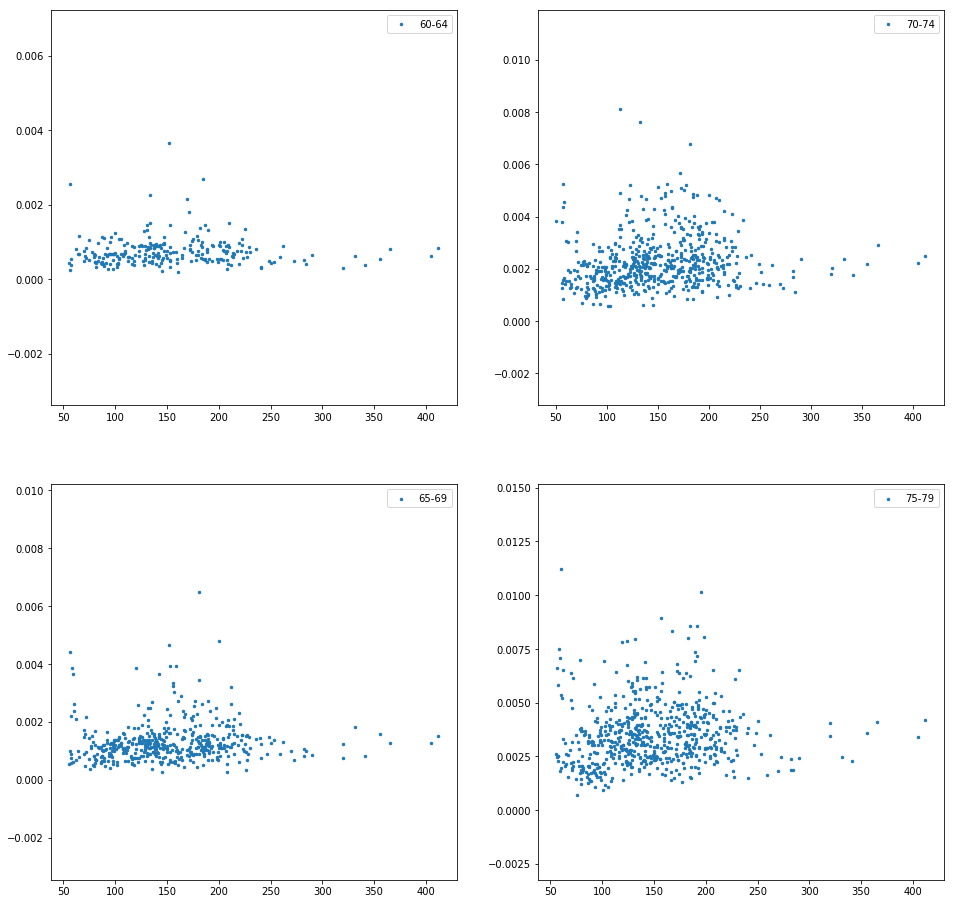

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (16,16));
axes[0,0].scatter([x[1] for x in cause(62, 'Medium Metro') ],[x[0] for x in cause(62, 'Medium Metro')], 
            label = '60-64',s=6);
axes[1,0].scatter([x[1] for x in cause(67, 'Medium Metro') ],[x[0] for x in cause(67, 'Medium Metro')], 
            label = '65-69',s=6);
axes[0,1].scatter([x[1] for x in cause(72, 'Medium Metro') ],[x[0] for x in cause(72, 'Medium Metro')], 
            label = '70-74', s=6);
axes[1,1].scatter([x[1] for x in cause(77, 'Medium Metro') ],[x[0] for x in cause(77, 'Medium Metro')], 
            label = '75-79', s=6);

axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
plt.show();

Control for all confounders and run EDA (with hope to see relationship between proportion of deaths and particulate matter density)

In [25]:
X = Death_m_concat_geo[['Comp_Year','Prevalence of Diabetes','Median_Income',
       'All Ages in Poverty Percent','2013 Urbanization Code','Five-Year Age Groups',
      'Population','latitude', 'longitude']]

scaler = MinMaxScaler(feature_range=(0, 1))
X_ = scaler.fit_transform(X)
k_means = cluster.KMeans(n_clusters=80)
X_fit = k_means.fit(X_)
labels = X_fit.labels_
Death_m_concat_geo['clusters'] = labels

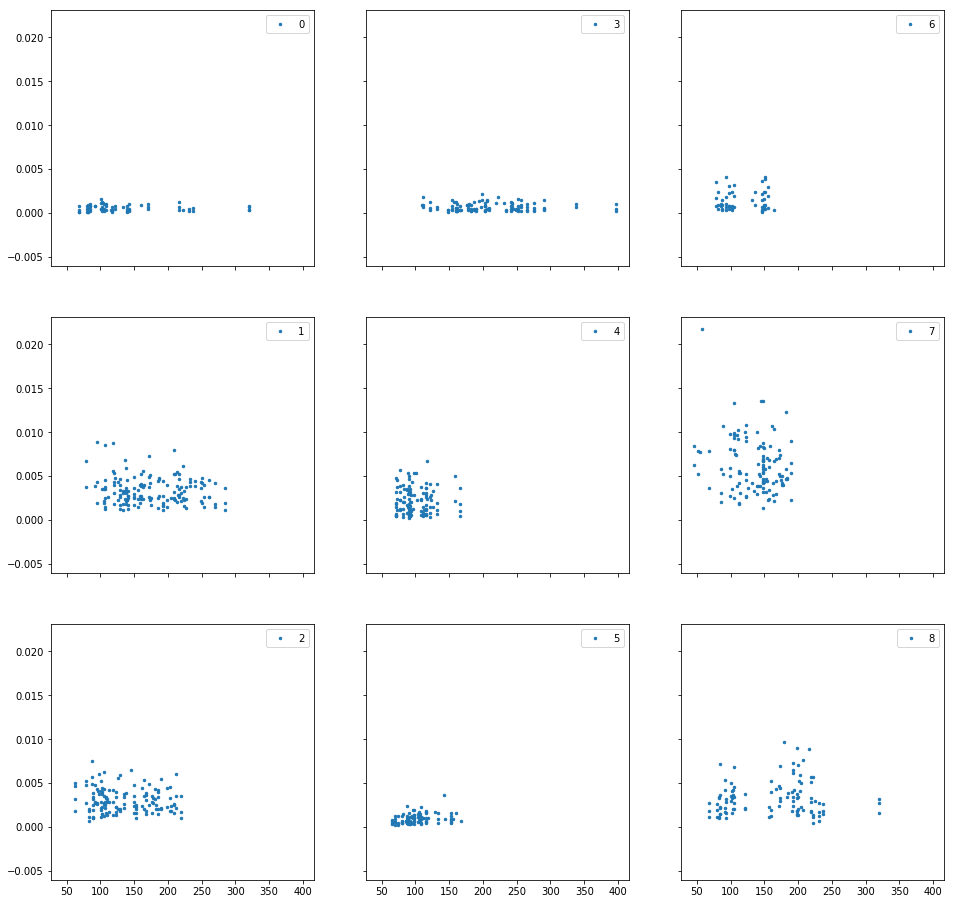

In [26]:
def cause_3(cluster):   
    df = Death_m_concat_geo[Death_m_concat_geo['clusters'] == cluster]
    #new_df5 = new_df5[new_df5['Value'] < 40]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    new_list = [x for x in zip(df['prop_death'],df['Value_sq'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2

fig, axes = plt.subplots(3, 3, figsize = (16,16), sharey=True, sharex = True);
axes[0,0].scatter([x[1] for x in cause_3(0) ],[x[0] for x in cause_3(0)], 
            label = '0',s=6);
axes[1,0].scatter([x[1] for x in cause_3(1) ],[x[0] for x in cause_3(1)], 
            label = '1',s=6);
axes[2,0].scatter([x[1] for x in cause_3(2) ],[x[0] for x in cause_3(2)], 
            label = '2', s=6);
axes[0,1].scatter([x[1] for x in cause_3(3) ],[x[0] for x in cause_3(3)], 
            label = '3', s=6);
axes[1,1].scatter([x[1] for x in cause_3(4) ],[x[0] for x in cause_3(4)], 
            label = '4', s=6);
axes[2,1].scatter([x[1] for x in cause_3(5) ],[x[0] for x in cause_3(5)], 
            label = '5', s=6);
axes[0,2].scatter([x[1] for x in cause_3(6) ],[x[0] for x in cause_3(6)], 
            label = '6', s=6);
axes[1,2].scatter([x[1] for x in cause_3(7) ],[x[0] for x in cause_3(7)], 
            label = '7', s=6);
axes[2,2].scatter([x[1] for x in cause_3(8) ],[x[0] for x in cause_3(8)], 
            label = '8', s=6);
axes[0,0].legend();
axes[1,0].legend();
axes[2,0].legend();
axes[0,1].legend();
axes[1,1].legend();
axes[2,1].legend();
axes[0,2].legend();
axes[1,2].legend();
axes[2,2].legend();

plt.show();

Control for confounders manually

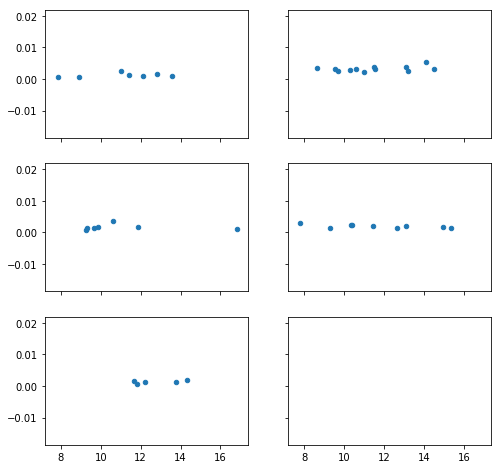

In [27]:
A = 40000
B = 50000
C = 10
D = 12
E = 8
F = 10
G = 3.0
H = 77 
I = 77
J = 2015

def cause_3(A,B,C,D,E,F,G,H,I,J):
    Death_Select = Death_m_concat_geo[(Death_m_concat_geo['Median_Income'].between(A, B, inclusive=True) & 
    Death_m_concat_geo['All Ages in Poverty Percent'].between(C, D, inclusive=True) &
    Death_m_concat_geo['Prevalence of Diabetes'].between(E, F, inclusive=False) &
          (Death_m_concat_geo['2013 Urbanization Code'] == G) &
    Death_m_concat_geo['Five-Year Age Groups'].between(H, I, inclusive=True)) &
    (Death_m_concat_geo['Comp_Year'] == J)]
    #new_df5 = new_df5[new_df5['Value'] < 40]
    #new_df2['Prop_death'] = new_df2['Prop_death'].apply(lambda x : np.log(x))
    new_list = [x for x in zip(Death_Select['prop_death'],Death_Select['Value'],
                               Death_Select['County']+" "+Death_Select['State'])]
    new_list2 = sorted(new_list, key=lambda x: x[1])
    return new_list2

fig, ax = plt.subplots(3,2,figsize = (8,8), sharey = True, sharex = True);
ax[0,0].scatter([x[1] for x in cause_3(45000,50000,10,12,8,10,3.0,67,67,2015)],
            [x[0] for x in cause_3(45000,50000,10,12,8,10,3.0,67,67,2015)], 
            label = '0',s=20);

ax[0,1].scatter([x[1] for x in cause_3(40000,45000,13,15,8,10,3.0,77,77,2015)],
           [x[0] for x in cause_3(40000,45000,13,15,8,10,3.0,77,77,2015)], 
            label = '1',s=20);

ax[1,0].scatter([x[1] for x in cause_3(50000,55000,8,10,6,8,3.0,72,72,2012)],
            [x[0] for x in cause_3(50000,55000,8,10,6,8,3.0,72,72,2012)], 
            label = '2',s=20);

ax[1,1].scatter([x[1] for x in cause_3(50000,55000,8,10,7,9,3.0,72,72,2014)],
           [x[0] for x in cause_3(50000,55000,8,10,7,9,3.0,72,72,2014)], 
           label = '3',s=20);

ax[2,0].scatter([x[1] for x in cause_3(40000,45000,15,17,9,11,3.0,67,67,2013)],
           [x[0] for x in cause_3(40000,45000,15,17,9,11,3.0,67,67,2013)], 
           label = '4',s=20);
#for i, txt in enumerate([x[2] for x in cause_3(A,B,C,D,E,F,G,H,I,J)]):
#    ax.annotate(txt, ([x[1] for x in cause_3(A,B,C,D,E,F,G,H,I,J)][i],
#                      [x[0] for x in cause_3(A,B,C,D,E,F,G,H,I,J)][i]),
#      fontsize = 6);

axes[0,0].legend();
axes[0,1].legend();
axes[1,0].legend();
axes[1,1].legend();
axes[2,0].legend();
plt.show();


Look at distribution of death counts

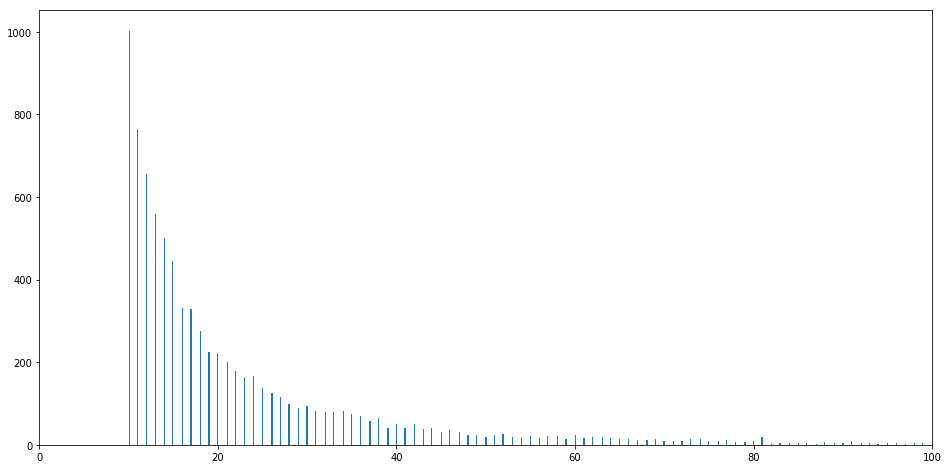

In [28]:
plt.figure(figsize = (16,8));
plt.hist(Death_m_concat_geo['Deaths'],bins=2000);
plt.xlim(0,100);
plt.show();

Run poisson model using all features to predit death counts per county, per age group

In [29]:
X_sm = Death_m_concat_geo[['Comp_Year','Prevalence of Diabetes',
       'All Ages in Poverty Percent','Value','2013 Urbanization Code',
       'latitude', 'longitude','Population','Five-Year Age Groups']]

X_sm_spec = X_sm[(X_sm['Five-Year Age Groups']>=1)&
                (X_sm['Population']>=1)&(X_sm['Population']<=100000) &
                (X_sm['Value']>=1)]

y_sm_spec  = Death_m_concat_geo[(Death_m_concat_geo['Five-Year Age Groups']>=1)&
                               (Death_m_concat_geo['Population']>=1)&(Death_m_concat_geo['Population']<=100000)
                               & (X_sm['Value']>=1)]

y_sm_spec = y_sm_spec['prop_death']*100000

scaler = MinMaxScaler(feature_range=(0, 1))
X_sm_t = scaler.fit_transform(X_sm_spec)

#X_sm_t = pd.DataFrame(X_sm_t, columns = ["Year","Five-Year Age Groups",'Median_Income',
#                   'All Ages in Poverty Percent','Prevalence of Diabetes',
#'2013 Urbanization Code','Value'])

X_sm_t_new = sm.add_constant(X_sm_t)

X_train, X_test, y_train, y_test = train_test_split(X_sm_t_new, y_sm_spec, test_size = .5)

sm_pois = sm.GLM(y_train,X_train, family =  Poisson()).fit_regularized()
sm_pois.params

const    4.422853
x1      -0.073780
x2       0.605968
x3      -0.010758
x4      -0.115919
x5       0.404900
x6      -0.144975
x7      -0.215520
x8      -2.861566
x9       1.850454
dtype: float64

In [30]:
y_pred = sm_pois.predict(X_test)

def r2(a,b):
    SSE = 0
    SST = 0
    for i, j in zip(a,b):
        SSE += (j - i)**2
        SST += (i - a.mean())**2 
    return 1 - SSE/SST

r2(y_test,y_pred)

0.70538752004785832

In [31]:
sm_nb = sm.GLM(y_train,X_train, family = sm.families.NegativeBinomial()).fit()
sm_nb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             prop_death   No. Observations:                 4079
Model:                            GLM   Df Residuals:                     4069
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    log   Scale:                  0.129184909194
Method:                          IRLS   Log-Likelihood:                -26422.
Date:                Wed, 18 Apr 2018   Deviance:                       503.46
Time:                        08:52:50   Pearson chi2:                     526.
No. Iterations:                     9                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1852      0.049     65.018      0.000       3.089       3.281
x1            -0.0942      0.017     -5.688      0.000      -0.127      -0.062
x2             1.0169      0.085     12.029      0.000       0.851       1.183
x3             0.0963      0.073      1.314      0.189      -0.047       0.240
x4            -0.0606      0.052     -1.174      0.240      -0.162       0.041
x5             0.5064      0.031     16.513      0.000       0.446       0.567
x6            -0.0721      0.033     -2.213      0.027      -0.136      -0.008
x7            -0.2199      0.025     -8.699      0.000      -0.269      -0.170
x8            -1.4211      0.049    -29.068      0.000      -1.517      -1.325
x9             2.8089      0.033     84.542      0.000       2.744       2.874
==============================================================================
"""

In [32]:
y_pred_nb = sm_nb.predict(X_test)

def r2(a,b):
    SSE = 0
    SST = 0
    for i, j in zip(a,b):
        SSE += (j - i)**2
        SST += (i - a.mean())**2 
    return 1 - SSE/SST

r2(y_test,y_pred_nb)

0.67852213975136144

Run linear model to do the same

In [33]:
Death_m_concat_geo_2 = Death_m_concat_geo[Death_m_concat_geo['Five-Year Age Groups']>=1]

X_lr_1 = Death_m_concat_geo_2[['Comp_Year','Prevalence of Diabetes',
       'All Ages in Poverty Percent', 'Value','2013 Urbanization Code',
       'latitude', 'longitude','Population','Five-Year Age Groups']]

X_lr_2 = Death_m_concat_geo_2[['Comp_Year','Prevalence of Diabetes','Median_Income',
       'All Ages in Poverty Percent','2013 Urbanization Code',
       'latitude', 'longitude','Population','Five-Year Age Groups']]

X_lr_3 = Death_m_concat_geo_2[['Value', 'Value_sq']]

y_lr = Death_m_concat_geo_2['Deaths']

scaler = MinMaxScaler(feature_range=(0, 1))

X_lr_t1 = scaler.fit_transform(X_lr_1)
X_lr_t2 = scaler.fit_transform(X_lr_2)
X_lr_t3 = scaler.fit_transform(X_lr_3)

lr1 = LinearRegression()
lr2 = LinearRegression()
lr3 = LinearRegression()

lr1.fit(X_lr_t1, y_lr)
lr2.fit(X_lr_t2, y_lr)
lr3.fit(X_lr_t3, y_lr)

print(lr1.score(X_lr_t1, y_lr),lr2.score(X_lr_t2, y_lr),lr3.score(X_lr_t3, y_lr))

0.372869699453 0.377889856762 0.0559409077674


Run Random Forest model to predict death counts

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_lr_1, Death_m_concat_geo_2['prop_death']*1000, test_size=0.3)
for i in range(10)[1:]:    
    rand_forest = RandomForestRegressor(n_estimators=5+i, min_samples_split=2*(i))
    rand_forest.fit(X_train, y_train)
    y_test_pred_rand_forest = rand_forest.predict(X_test)
    print('n_estimators:',(5+i), rand_forest.score(X_test,y_test),
          'min_samples_split:',5*(i), rand_forest.score(X_train, y_train),
         rand_forest.feature_importances_)

n_estimators: 6 0.873536037881 min_samples_split: 5 0.972466225503 [ 0.00637288  0.0210869   0.01840243  0.02050428  0.00364485  0.01861932
  0.02176823  0.70672044  0.18288068]
n_estimators: 7 0.876615125173 min_samples_split: 10 0.969211223188 [ 0.00568455  0.01909702  0.01831664  0.02139474  0.00359309  0.01826148
  0.02215747  0.70461438  0.18688063]
n_estimators: 8 0.881309574667 min_samples_split: 15 0.963910175709 [ 0.00451058  0.0169777   0.01794718  0.01989139  0.00324398  0.01818547
  0.02011116  0.71704357  0.18208898]
n_estimators: 9 0.877822144421 min_samples_split: 20 0.957244242496 [ 0.00368036  0.01869429  0.01712703  0.01841182  0.00348172  0.01472677
  0.02005026  0.72213213  0.18169562]
n_estimators: 10 0.883193698927 min_samples_split: 25 0.955042201997 [ 0.00287288  0.01559949  0.01662063  0.0156382   0.00261668  0.01772801
  0.01777124  0.72588634  0.18526653]
n_estimators: 11 0.882394083672 min_samples_split: 30 0.95076186326 [ 0.00268413  0.01475866  0.01389081 